<a href="https://colab.research.google.com/github/tadashi000000/googlecolab001/blob/main/machinelearning001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

機械学習用

4-2-2 データの読込

In [26]:
import numpy as np
from sklearn import datasets

#150個、3品種のアイリスの花のサイズからなるデータセット
#各花には4つの測定値と、品種を表す0から2のラベルがあります。データの総数は150です
iris = datasets.load_iris()

#測定値
print(type(iris.data), end=''); print(iris.data.shape)
print(iris.data[:10]) #4つの測定値を10組表示

#ラベル
print(type(iris.target), end=''); print(iris.target.shape)
print(iris.target) #ラベルを全て表示


<class 'numpy.ndarray'>(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


4-2-3 データの前処理

In [28]:
from sklearn import preprocessing
from keras.utils import np_utils

# ---- 入力 データ ----
#今回は、入力データへの前処理として、入力の標準化を行います。
#標準化は、平均値が0、標準偏差が1になるように変換する処理です。
scaler = preprocessing.StandardScaler() #標準化のためのスケーラー
scaler.fit(iris.data) #変換のためのパラメータを計算
x = scaler.transform(iris.data) #データの変換
print(type(x),end=''); print(x.shape)
print(x[:10]) #入力を10件表示

# ---- 正解データ ----
t = np_utils.to_categorical(iris.target) #ラベルをone-hot表現に変換
print(type(t),end=''); print(t.shape)
print(t[:10]) #正解ラベルを10件表示

<class 'numpy.ndarray'>(150, 4)
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
<class 'numpy.ndarray'>(150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


4-2-4 訓練とテストデータ

In [29]:
from sklearn.model_selection import train_test_split

# x_train: 訓練用の入力データ
# x_test: テスト用の入力データ
# t_train: 訓練用の正解データ
# t_test: テスト用の正解データ
# train_size=0.75: 75%が訓練用、25%がテスト用
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

print(type(x_train),end=''); print(x_train.shape)
print(type(x_test),end=''); print(x_test.shape)
print(type(t_train),end=''); print(t_train.shape)
print(type(t_test),end=''); print(t_test.shape)


<class 'numpy.ndarray'>(112, 4)
<class 'numpy.ndarray'>(38, 4)
<class 'numpy.ndarray'>(112, 3)
<class 'numpy.ndarray'>(38, 3)


4-2-5 モデルの構築

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(32, input_dim=4)) # 4つの特徴が入力なので、入力の数は4、ニューロン数は32
model.add(Activation('relu')) # 活性化関数（ReLU）を追加

model.add(Dense(32)) # ニューロン数32の全結合層を追加
model.add(Activation('relu')) # 活性化関数（ReLU）を追加

model.add(Dense(3)) # 3つに分類するので、ニューロン数は3
model.add(Activation('softmax')) # 3つ以上の分類にはソフトマックス関数を使用

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) # モデルのコンパイル

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                160       
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
activation_4 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 99        
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 1,315
Trainable params: 1,315
Non-trainable params: 0
____________________________________________________

4-2-6 学習

In [24]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 0s 2ms/step - loss: 0.3657 - accuracy: 0.8750
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8661
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.3507 - accuracy: 0.8750
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8839
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8929
Epoch 6/30
14/14 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8929
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8839
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8929
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8929
Epoch 10/30
14/14 [==============================] - 0s 3ms/step - loss: 0.3068 - accuracy: 0.8929
Epoch 11/30
14/14 [

4-2-7 学習の推移

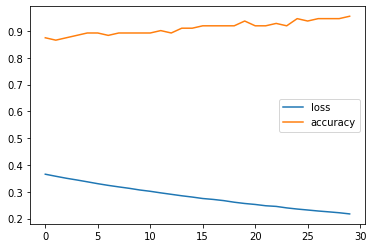

In [31]:
import matplotlib.pyplot as plt

hist_loss = history.history['loss']  # 訓練用データの誤差
hist_acc = history.history['accuracy']  # 訓練用データの精度（正解率）

plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')  # 誤差
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')  # 精度（正解率）
plt.legend()
plt.show()

4-2-8 評価

4-2-9 予測

4-2-10 モデルの保存